In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [3]:
# Get only the cubes that have our line of interest in them
mol_tag = 32003 # 32504
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=21>
   FREQ     ERR    LGINT     DR    ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz      MHz   MHz nm2         1 / cm                                     
 float64  float64 float64  int64 float64  int64 int64 int64   str8     str8  
--------- ------- -------- ----- -------- ----- ----- ----- -------- --------
85568.131   0.011  -5.0911     3   49.035    13 32003  1304  6-2   0  7-1   0
85773.081   0.042  -6.2214     3  824.879    31 32003  1304 1510   1 1511   1
85959.642   0.452 -10.1477     3  1294.42    69 32003  1304 34-6   1 35-4   1
86111.464   0.011   -7.576     3   73.561    19 32003  1304  9-1   0  8 2   0
86208.388   0.045  -6.2063     3  850.558    33 32003  1304 1610   1 1611   1
 86359.95   4.368  -8.0809     3 1944.908    81 32003  1304 4010   1 4011   1
86554.831   0.125  -9.4958     3  925.028    57 32003  1304 28 3 - 1 29 1 - 1
86585.305   200.0 -10.3495     3 2635.069   146 32003  1304 3620 + 1 3519 - 2
86615.574   0.013  -5.2908     3   68.493    

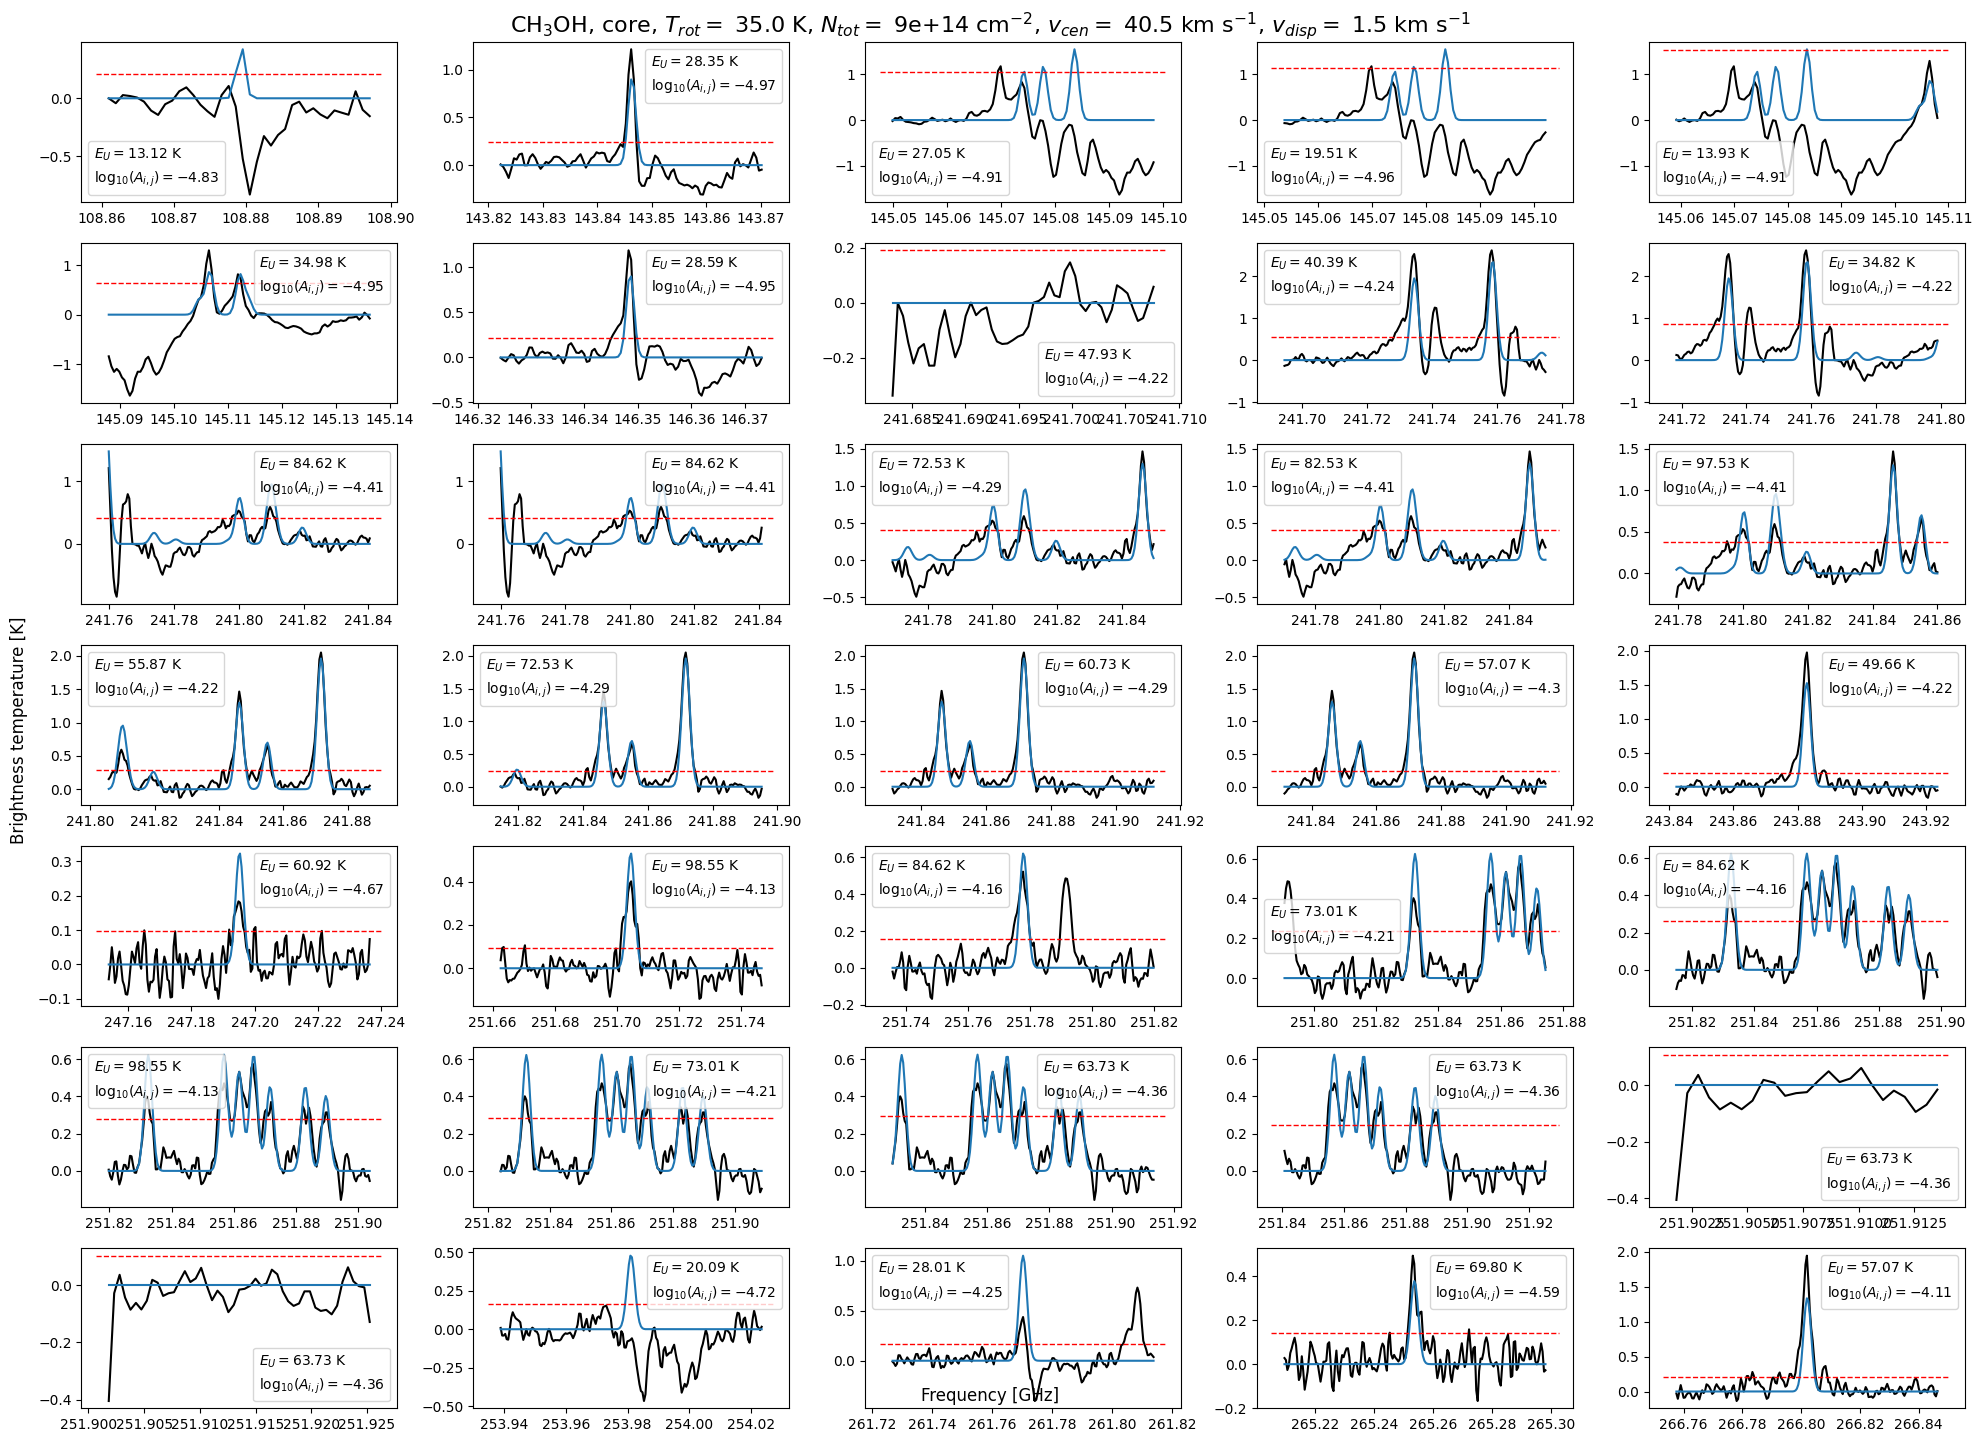

In [5]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 35., N_tot = 9.0e+14, v_cen = 40.5*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=7, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'CH$_3$OH', extr_type="coord", 
               crd=crd, EU_cutoff_K=100, show_2_sigma=True)

In [6]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

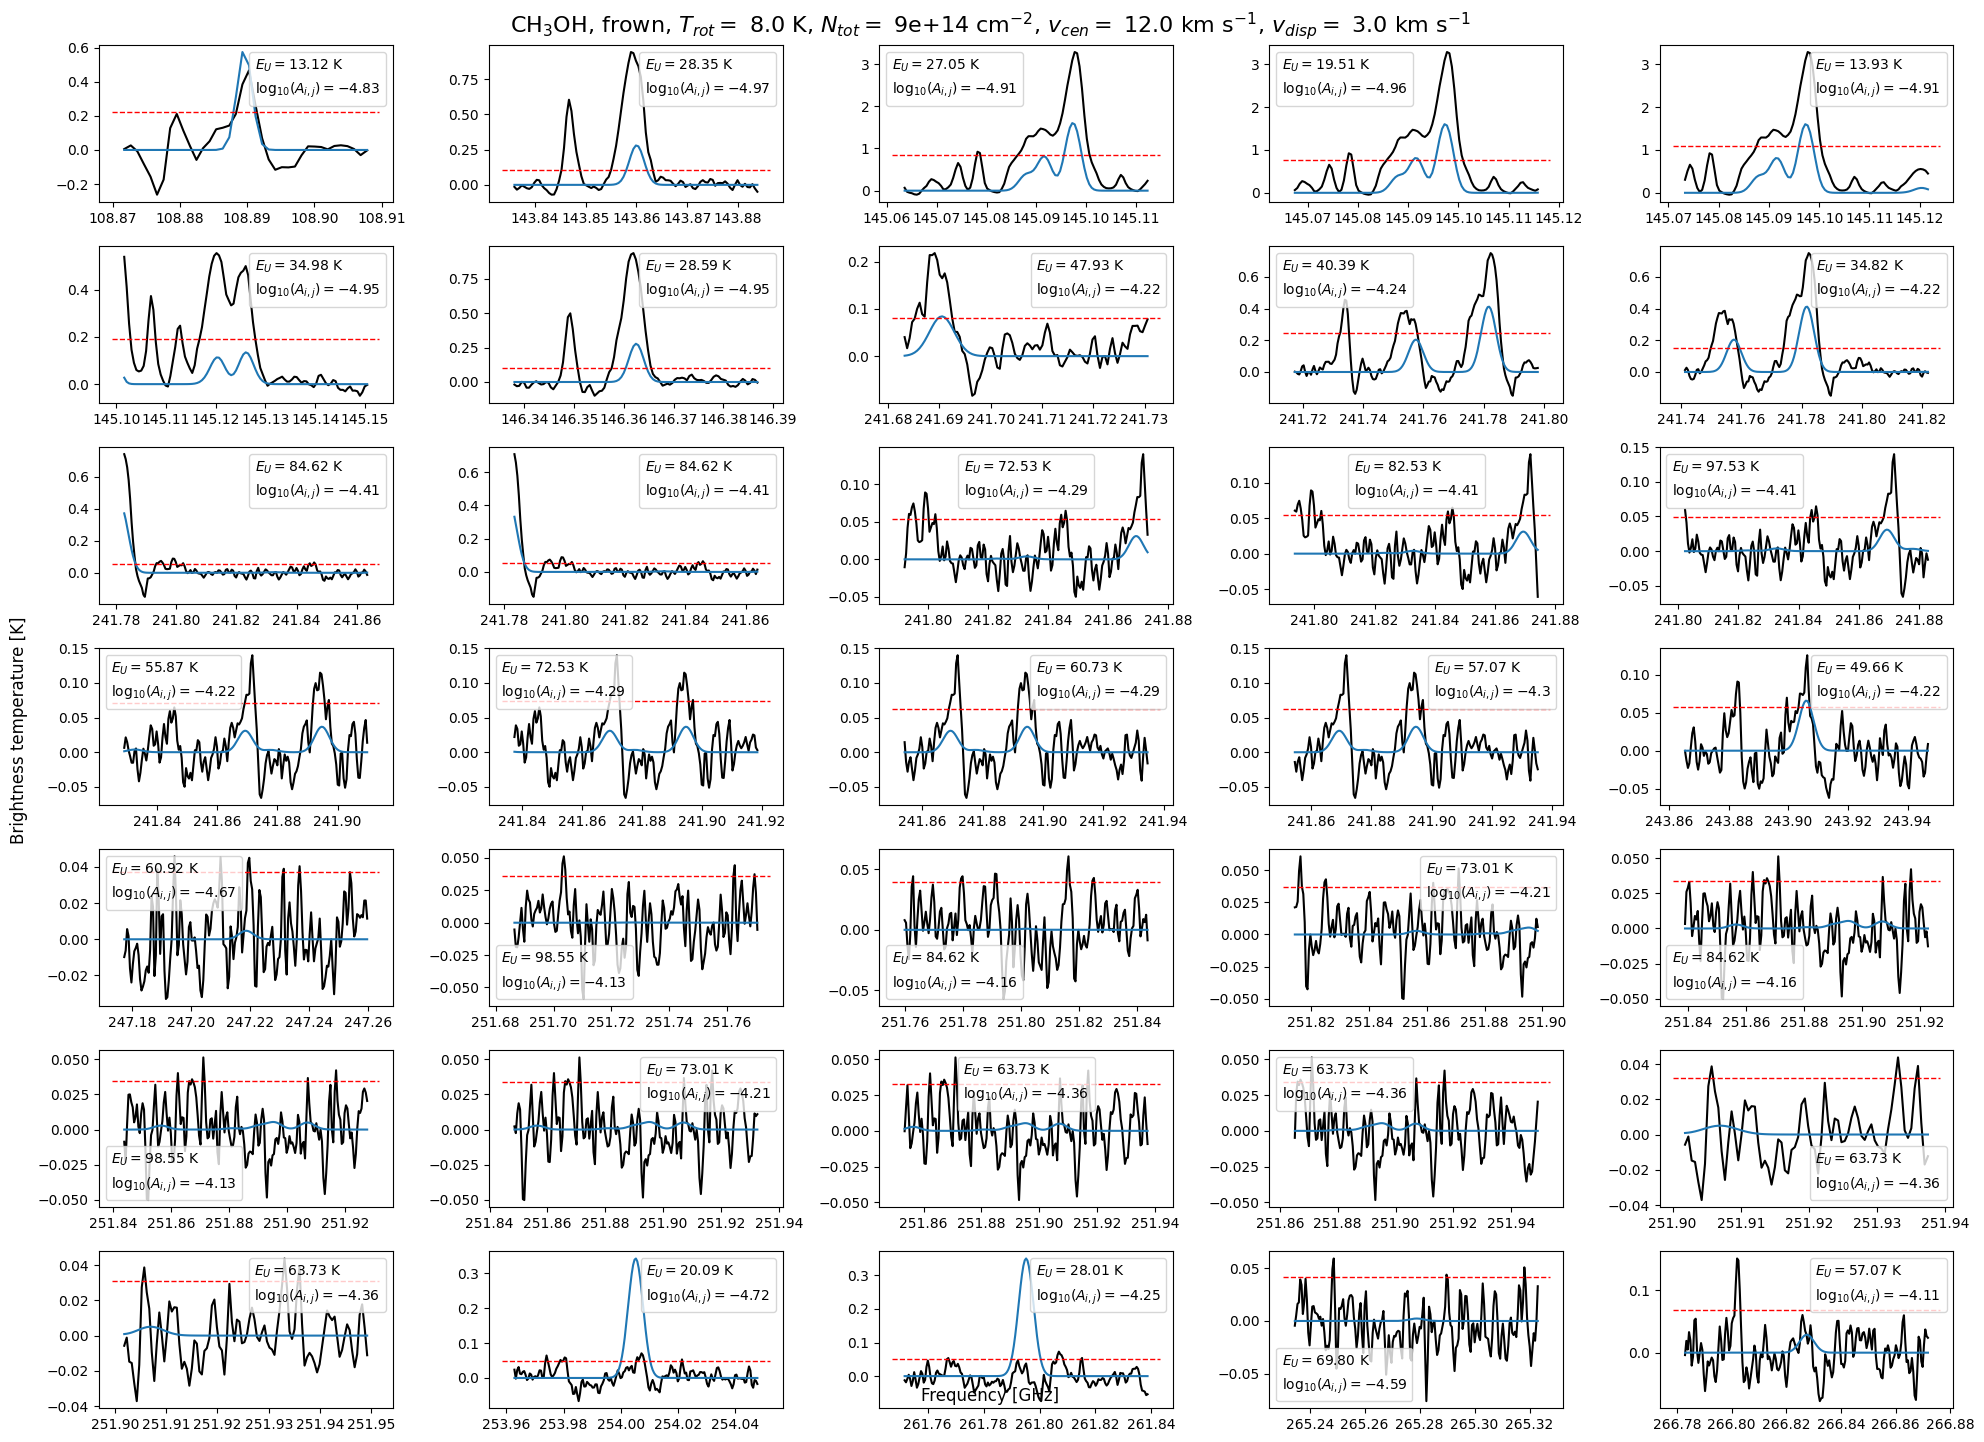

In [11]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 8., N_tot = 9.0e+14, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                      mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                      nrows=7, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3$OH', 
                      extr_type="reg", just_data=False, EU_cutoff_K=100, show_2_sigma=True, return_freqs=True)

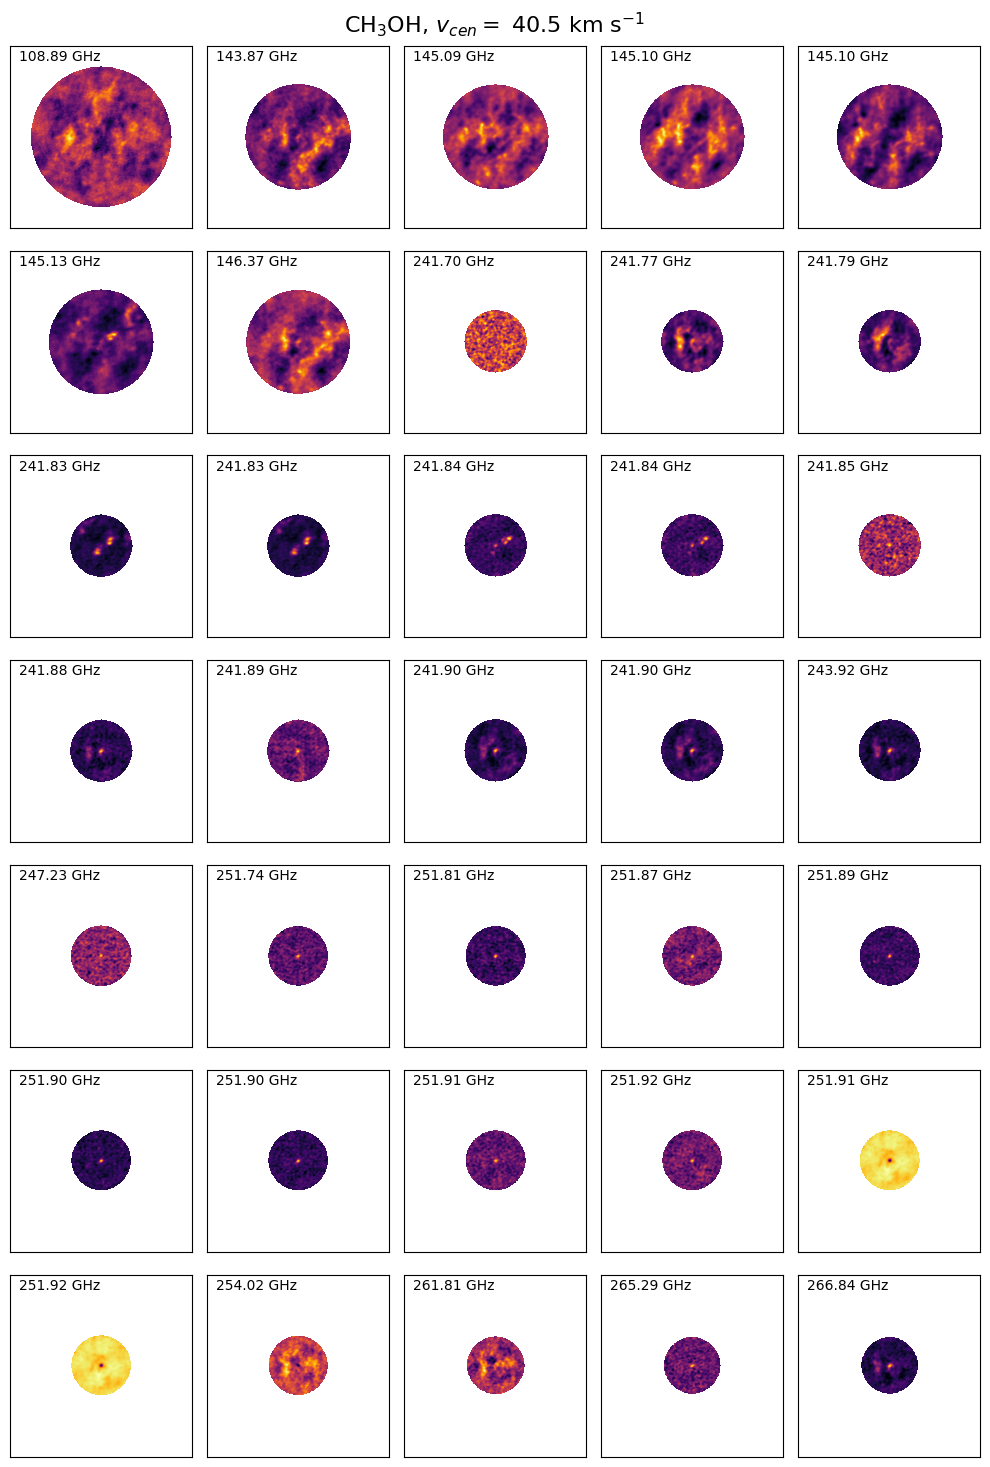

In [15]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.5*u.km/u.s, fig_width=10, fig_height=15, nrows=7, ncols=5, name_for_plot=f'CH$_3$OH')

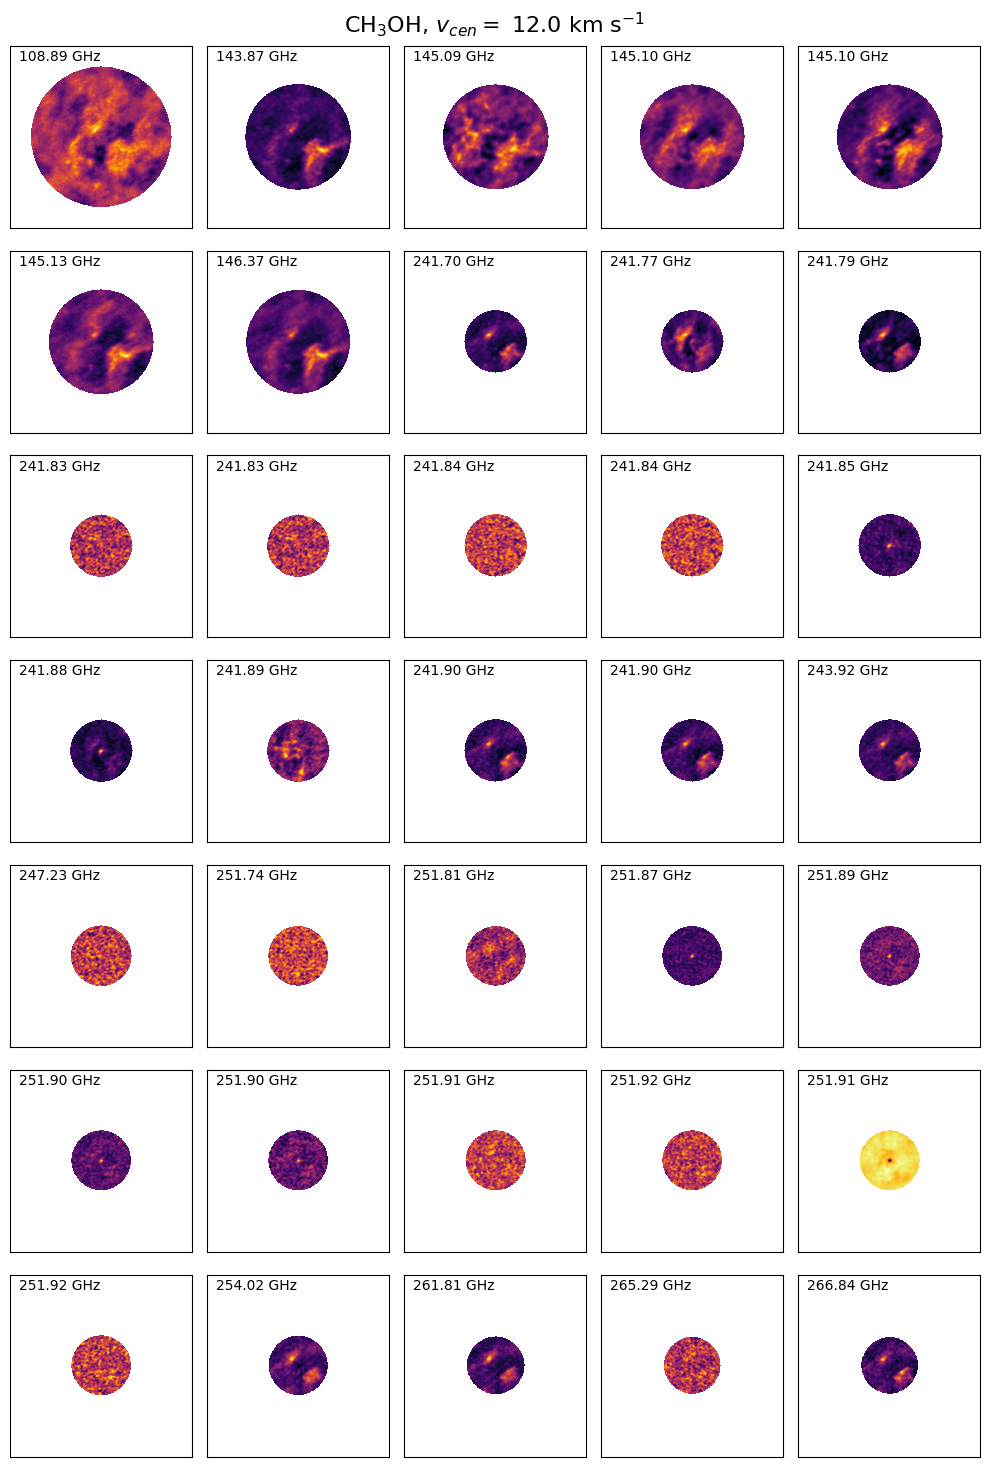

In [16]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=15, nrows=7, ncols=5, name_for_plot=f'CH$_3$OH')

In [20]:
import pyspeckit
spec_fn = "/blue/adamginsburg/abulatek/brick/symlinks/contsub_smoothed_cubes_K/avg_spectra_core/spectrum_241683218406.6262_243557699871.46.fits"
sp = pyspeckit.Spectrum(spec_fn)
xarr = sp.xarr

In [25]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, generate_fitter, generate_model

freqs, aij, deg, EU, partfunc = get_molecular_parameters('CH3OH',
                                                         fmin=np.min(xarr),
                                                         fmax=np.max(xarr))
def modfunc(xarr, vcen, width, tex, column):
    return generate_model(xarr, vcen, width, tex, column, freqs=freqs, aij=aij,
                          deg=deg, EU=EU, partfunc=partfunc)

fitter = generate_fitter(modfunc, name="CH3OH")

(241700000000.0, 242000000000.0)

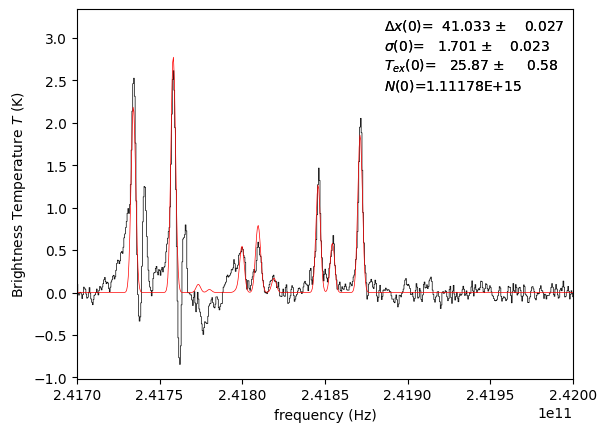

In [29]:
sp.plotter()
sp.specfit.register_fitter(name='CH3OH_LTE', function=fitter, npars=4)
sp.specfit(fittype='CH3OH_LTE', guesses=[40.5, 1.5, 35, 9.0E+14])
plt.xlim(2.417e11, 2.42e11)